In [14]:
""" Imaging to understand what happens with opacities and optical depth """

' Imaging to understand what happens with opacities and optical depth '

In [15]:
# Vanilla imports
import numpy as np
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors as colors

# Chocolate imports
from src.Luminosity.thermR import get_thermr
from src.Opacity.opacity_table import opacity

# Constants
c = 2.99792458e10 #[cm/s]
h = 6.62607015e-27 #[gcm^2/s]
Kb = 1.380649e-16 #[gcm^2/s^2K]
alpha = 7.5646 * 10**(-15) # radiation density [erg/cm^3K^4]
Rsol_to_cm = 6.957e10

In [18]:
# PLOT FOR ELENA
loadpath = 'src/Opacity/'
lnT = np.loadtxt(loadpath + 'T.txt')
lnrho = np.loadtxt(loadpath + 'rho.txt')
lnk_ross = np.loadtxt(loadpath + 'ross.txt')
lnk_planck = np.loadtxt(loadpath + 'planck.txt')
lnrho_extended = np.loadtxt(loadpath + 'big_lnrho.txt')
lnk_ross_extended = np.loadtxt(loadpath + 'ross_expansion.txt')
lnk_planck_extended = np.loadtxt(loadpath + 'planck_expansion.txt')

Text(0.5, 1.0, 'Rosseland opacity')

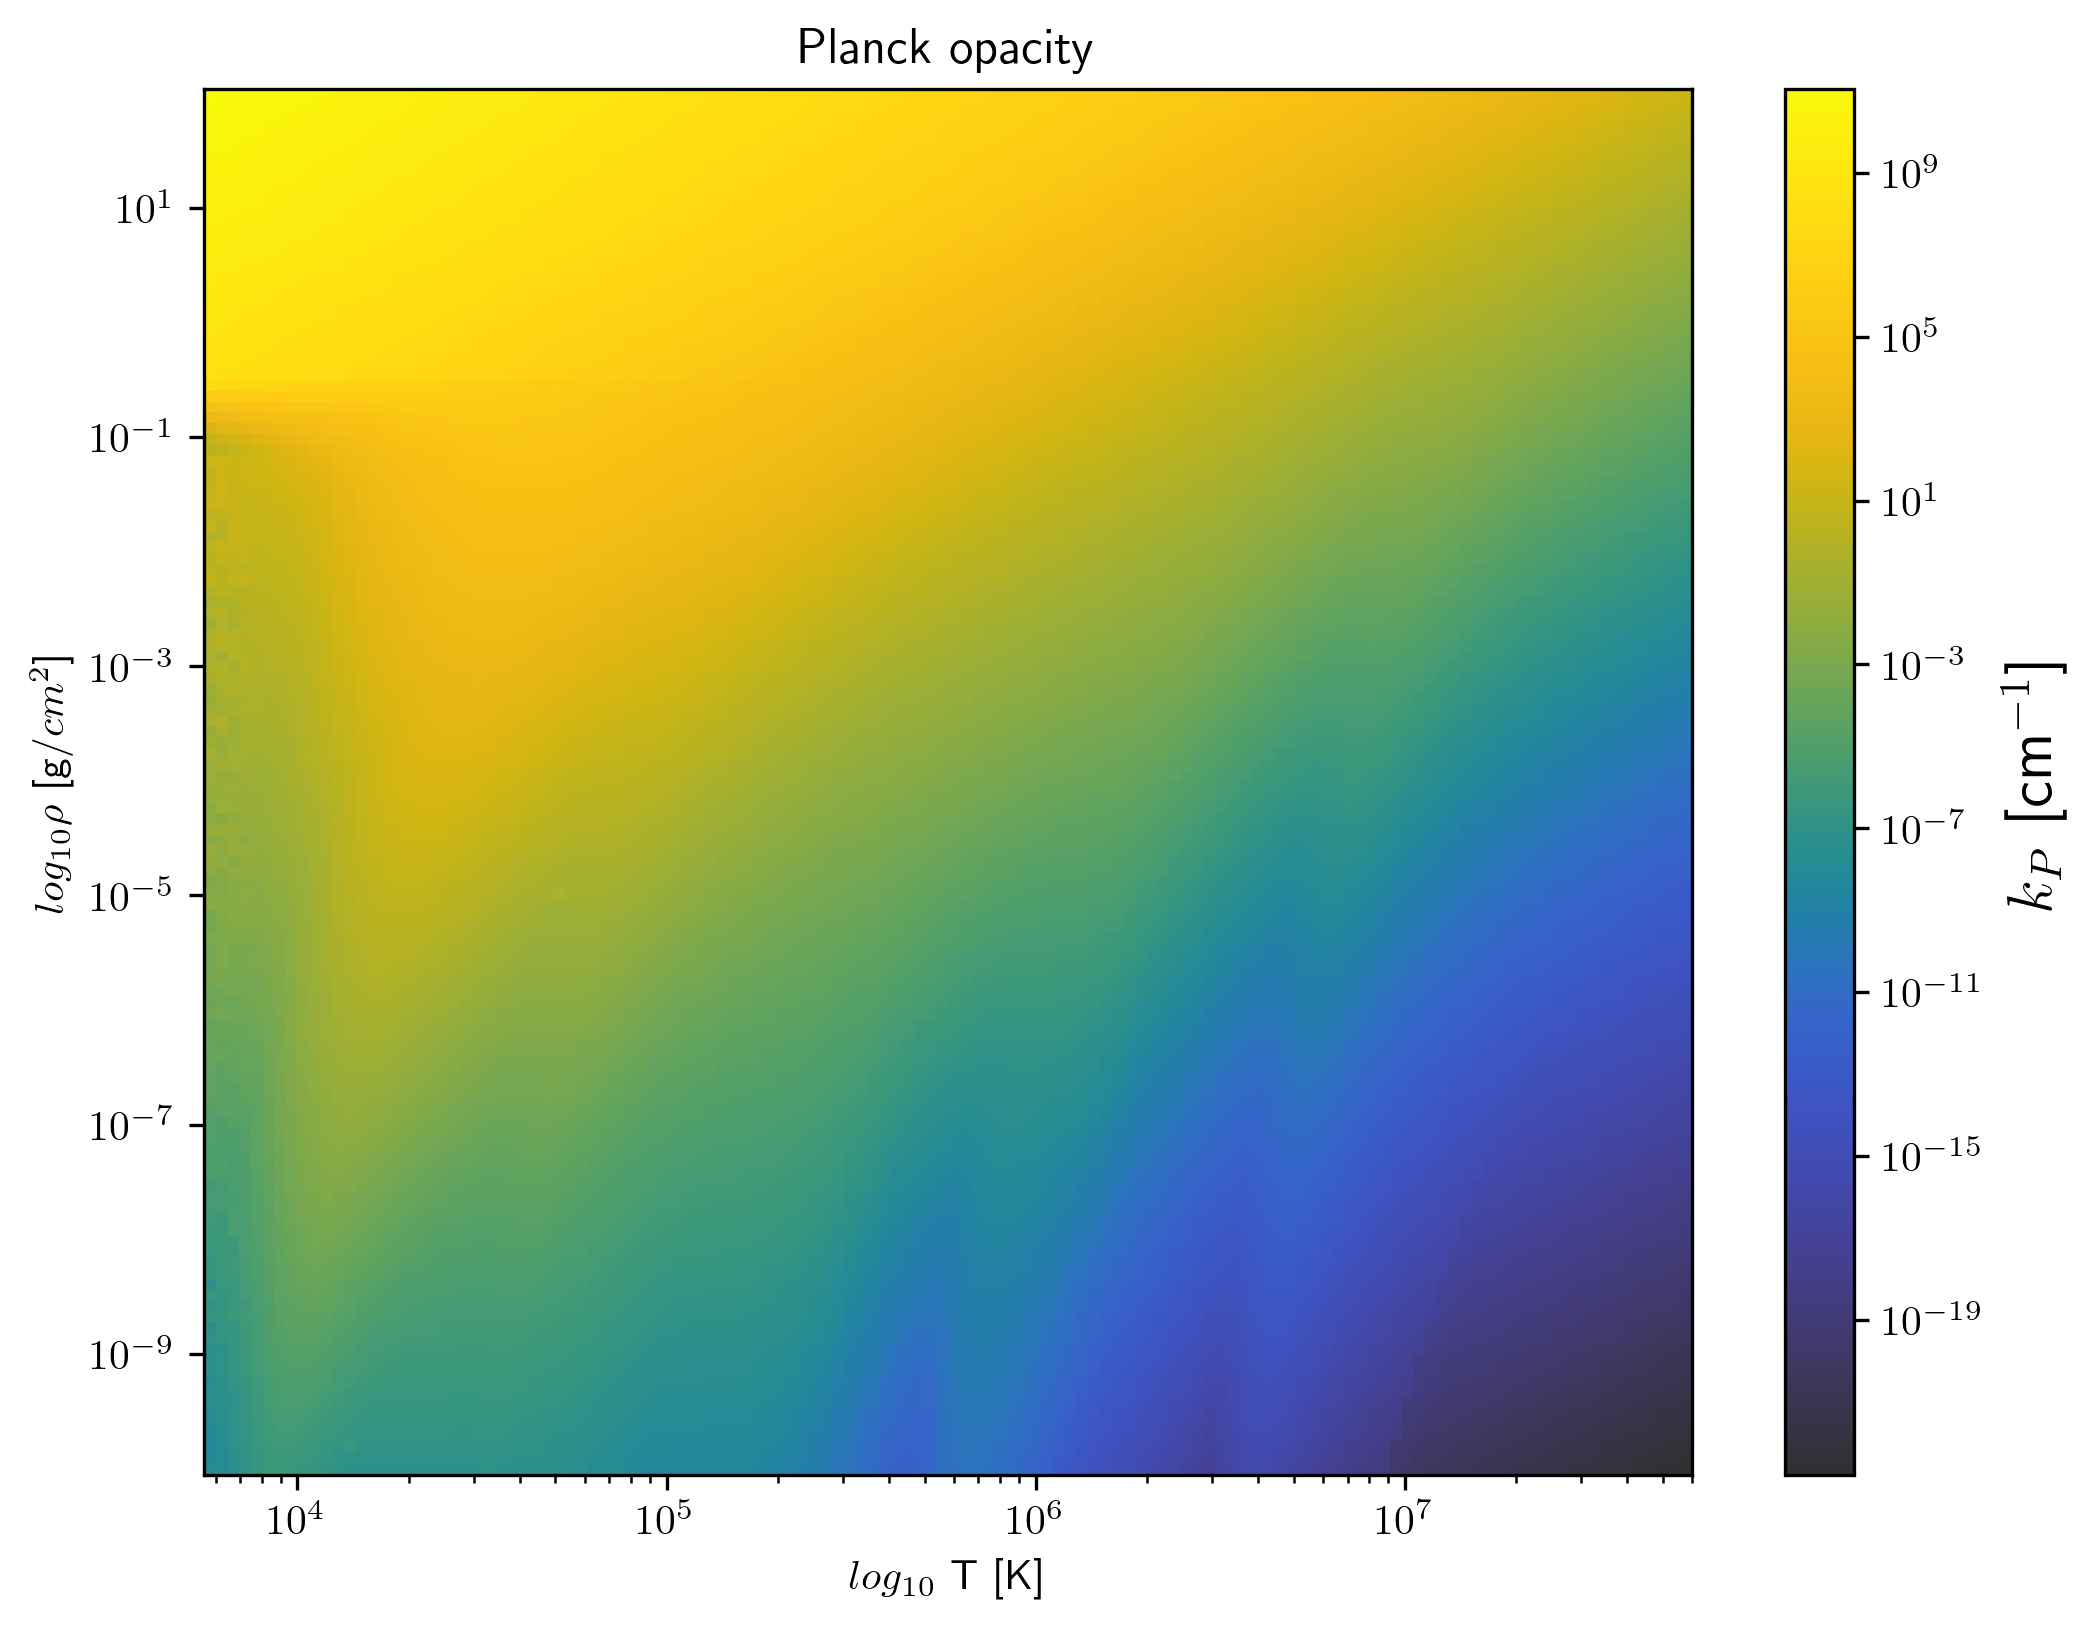

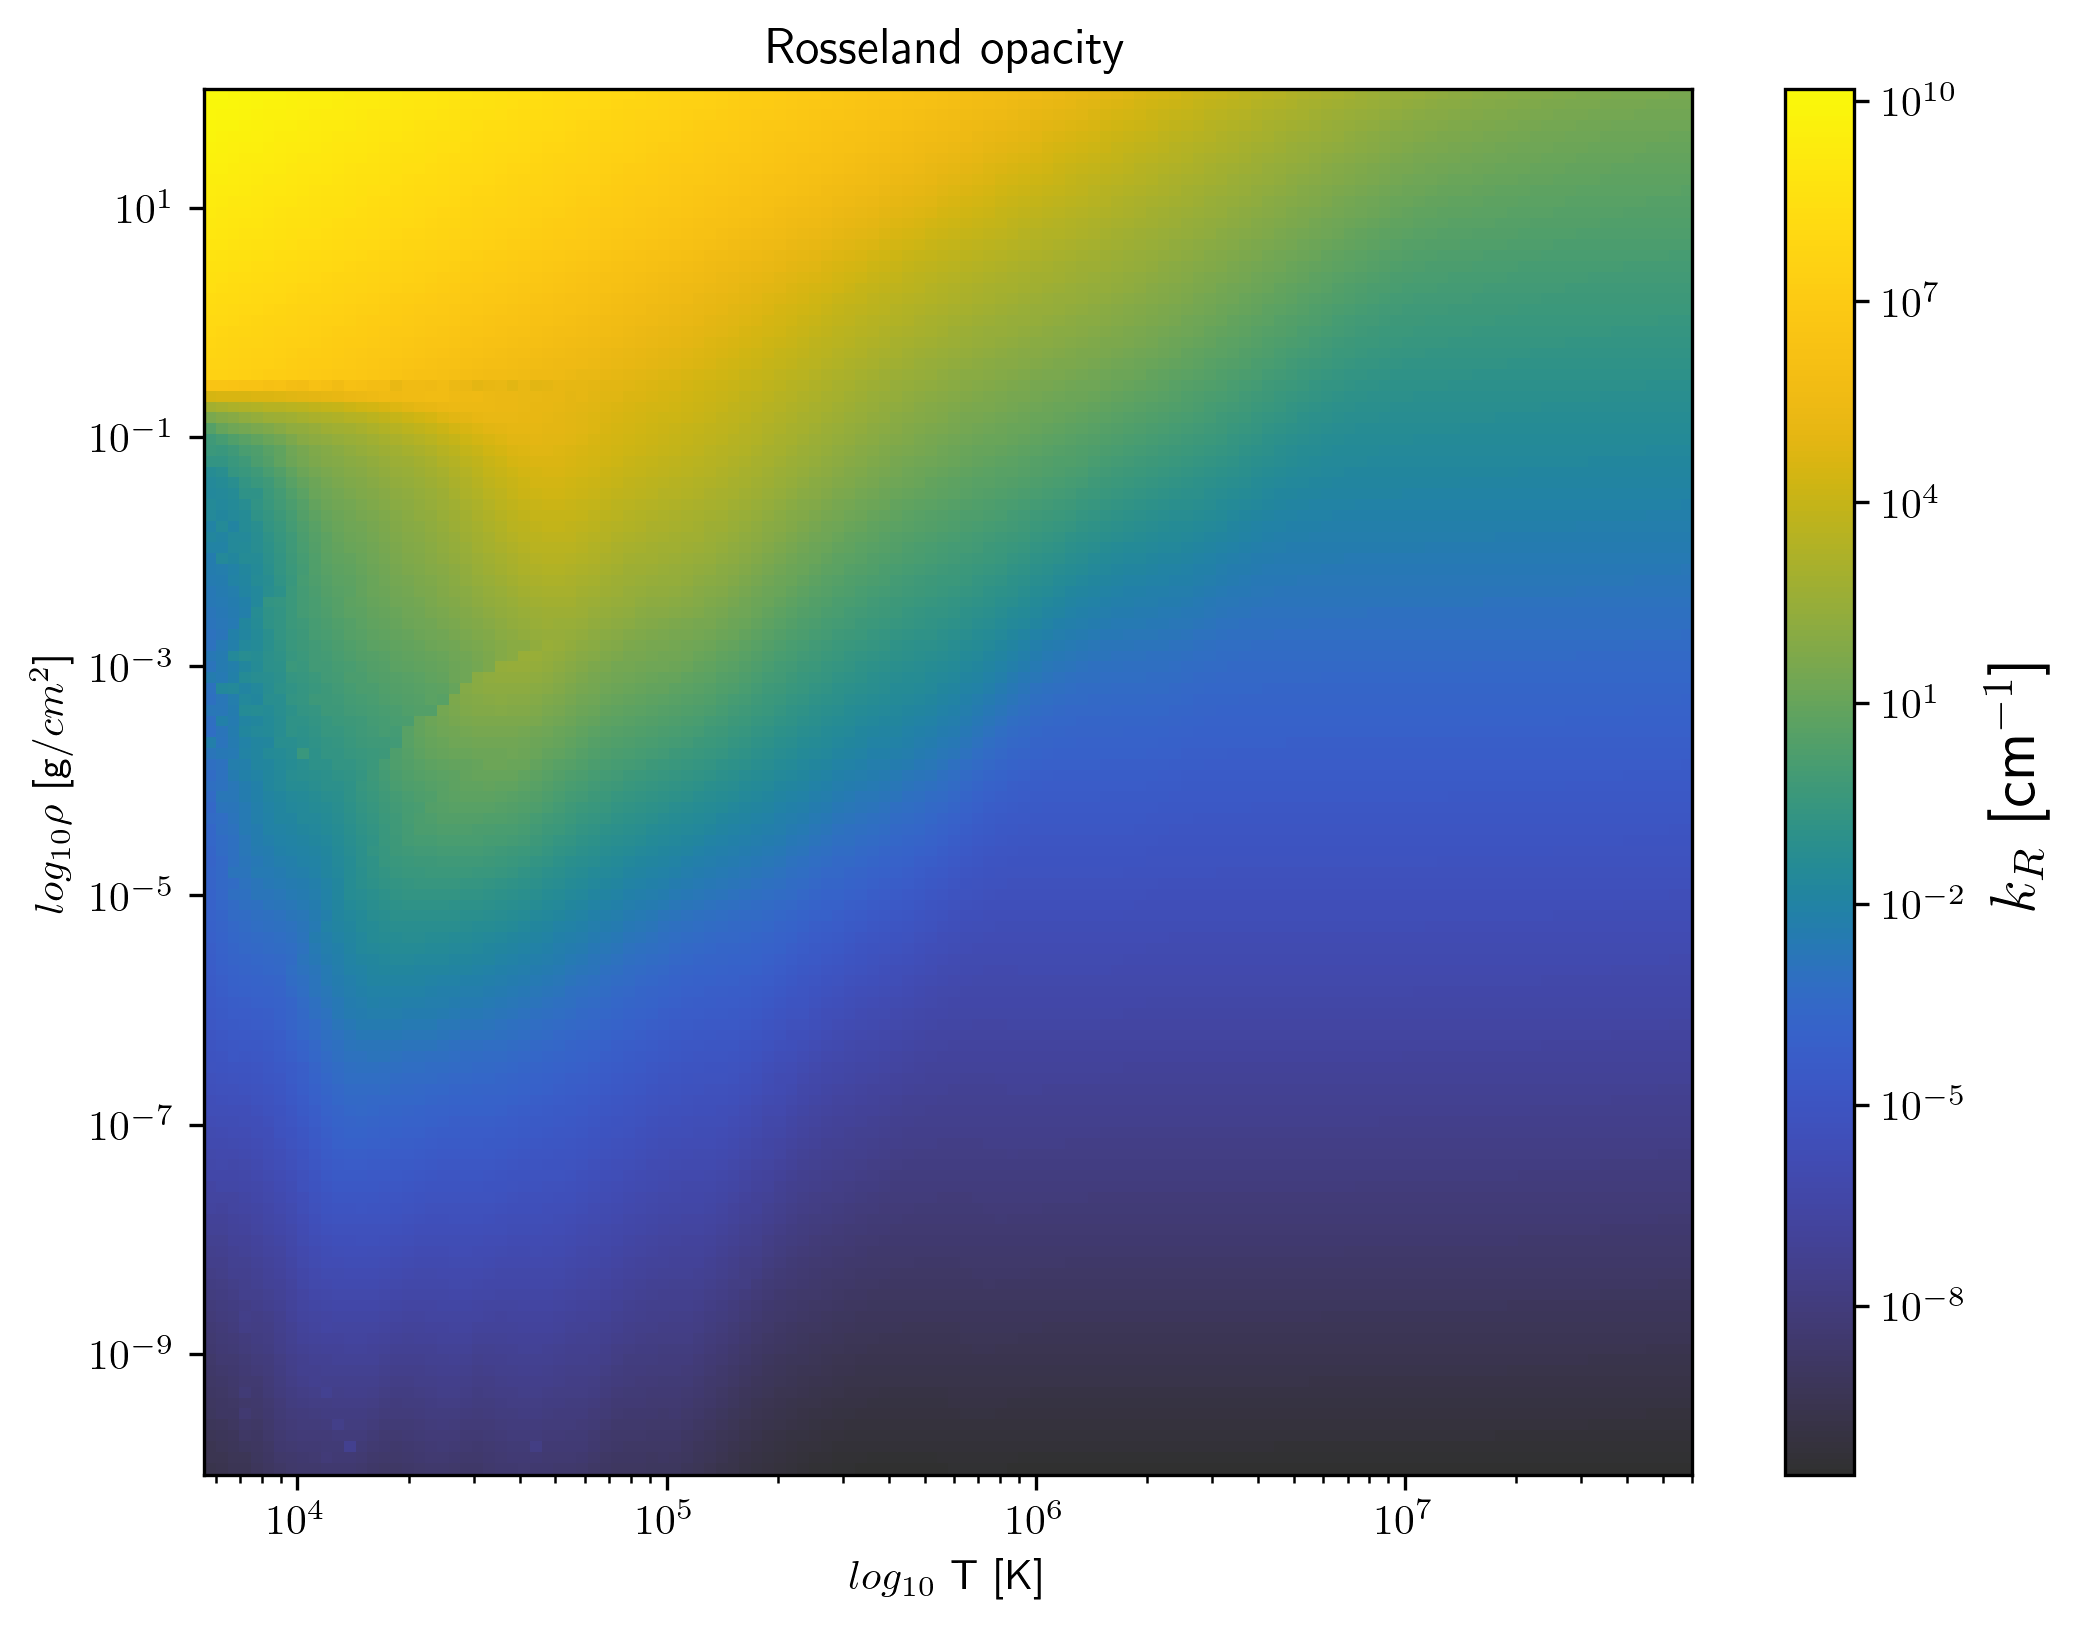

In [34]:
plt.figure(figsize = (8,6))
T = np.exp(lnT)
rho = np.exp(lnrho)
planck = np.exp(lnk_planck)
ross = np.exp(lnk_ross)

img = plt.pcolormesh(T, rho, planck.T, cmap = 'cet_gouldian', norm = colors.LogNorm())
cbar = plt.colorbar(img)
cbar.set_label(r'$k_P$ [cm$^{-1}$]', fontsize = 15)
plt.xlabel('$log_{10}$ T [K]')
plt.ylabel(r'$log_{10}\rho$ [g/$cm^2$]')
img.axes.get_yaxis().set_ticks([])
plt.loglog()
plt.savefig('Paola/k_P.png')
plt.title('Planck opacity')

plt.figure(figsize = (8,6))
img = plt.pcolormesh(T, rho, ross.T, cmap = 'cet_gouldian', norm = colors.LogNorm())
cbar = plt.colorbar(img)
plt.title('Rosseland opacity')
cbar.set_label(r'$k_R$ [cm$^{-1}$]', fontsize = 15)
plt.xlabel('$log_{10}$ T [K]')
plt.ylabel(r'$log_{10}\rho$ [g/$cm^2$]')
img.axes.get_yaxis().set_ticks([])
plt.loglog()
plt.savefig('Paola/k_R.png')
plt.title('Rosseland opacity')

Text(0.5, 1.0, 'Rosseland opacity (extended)')

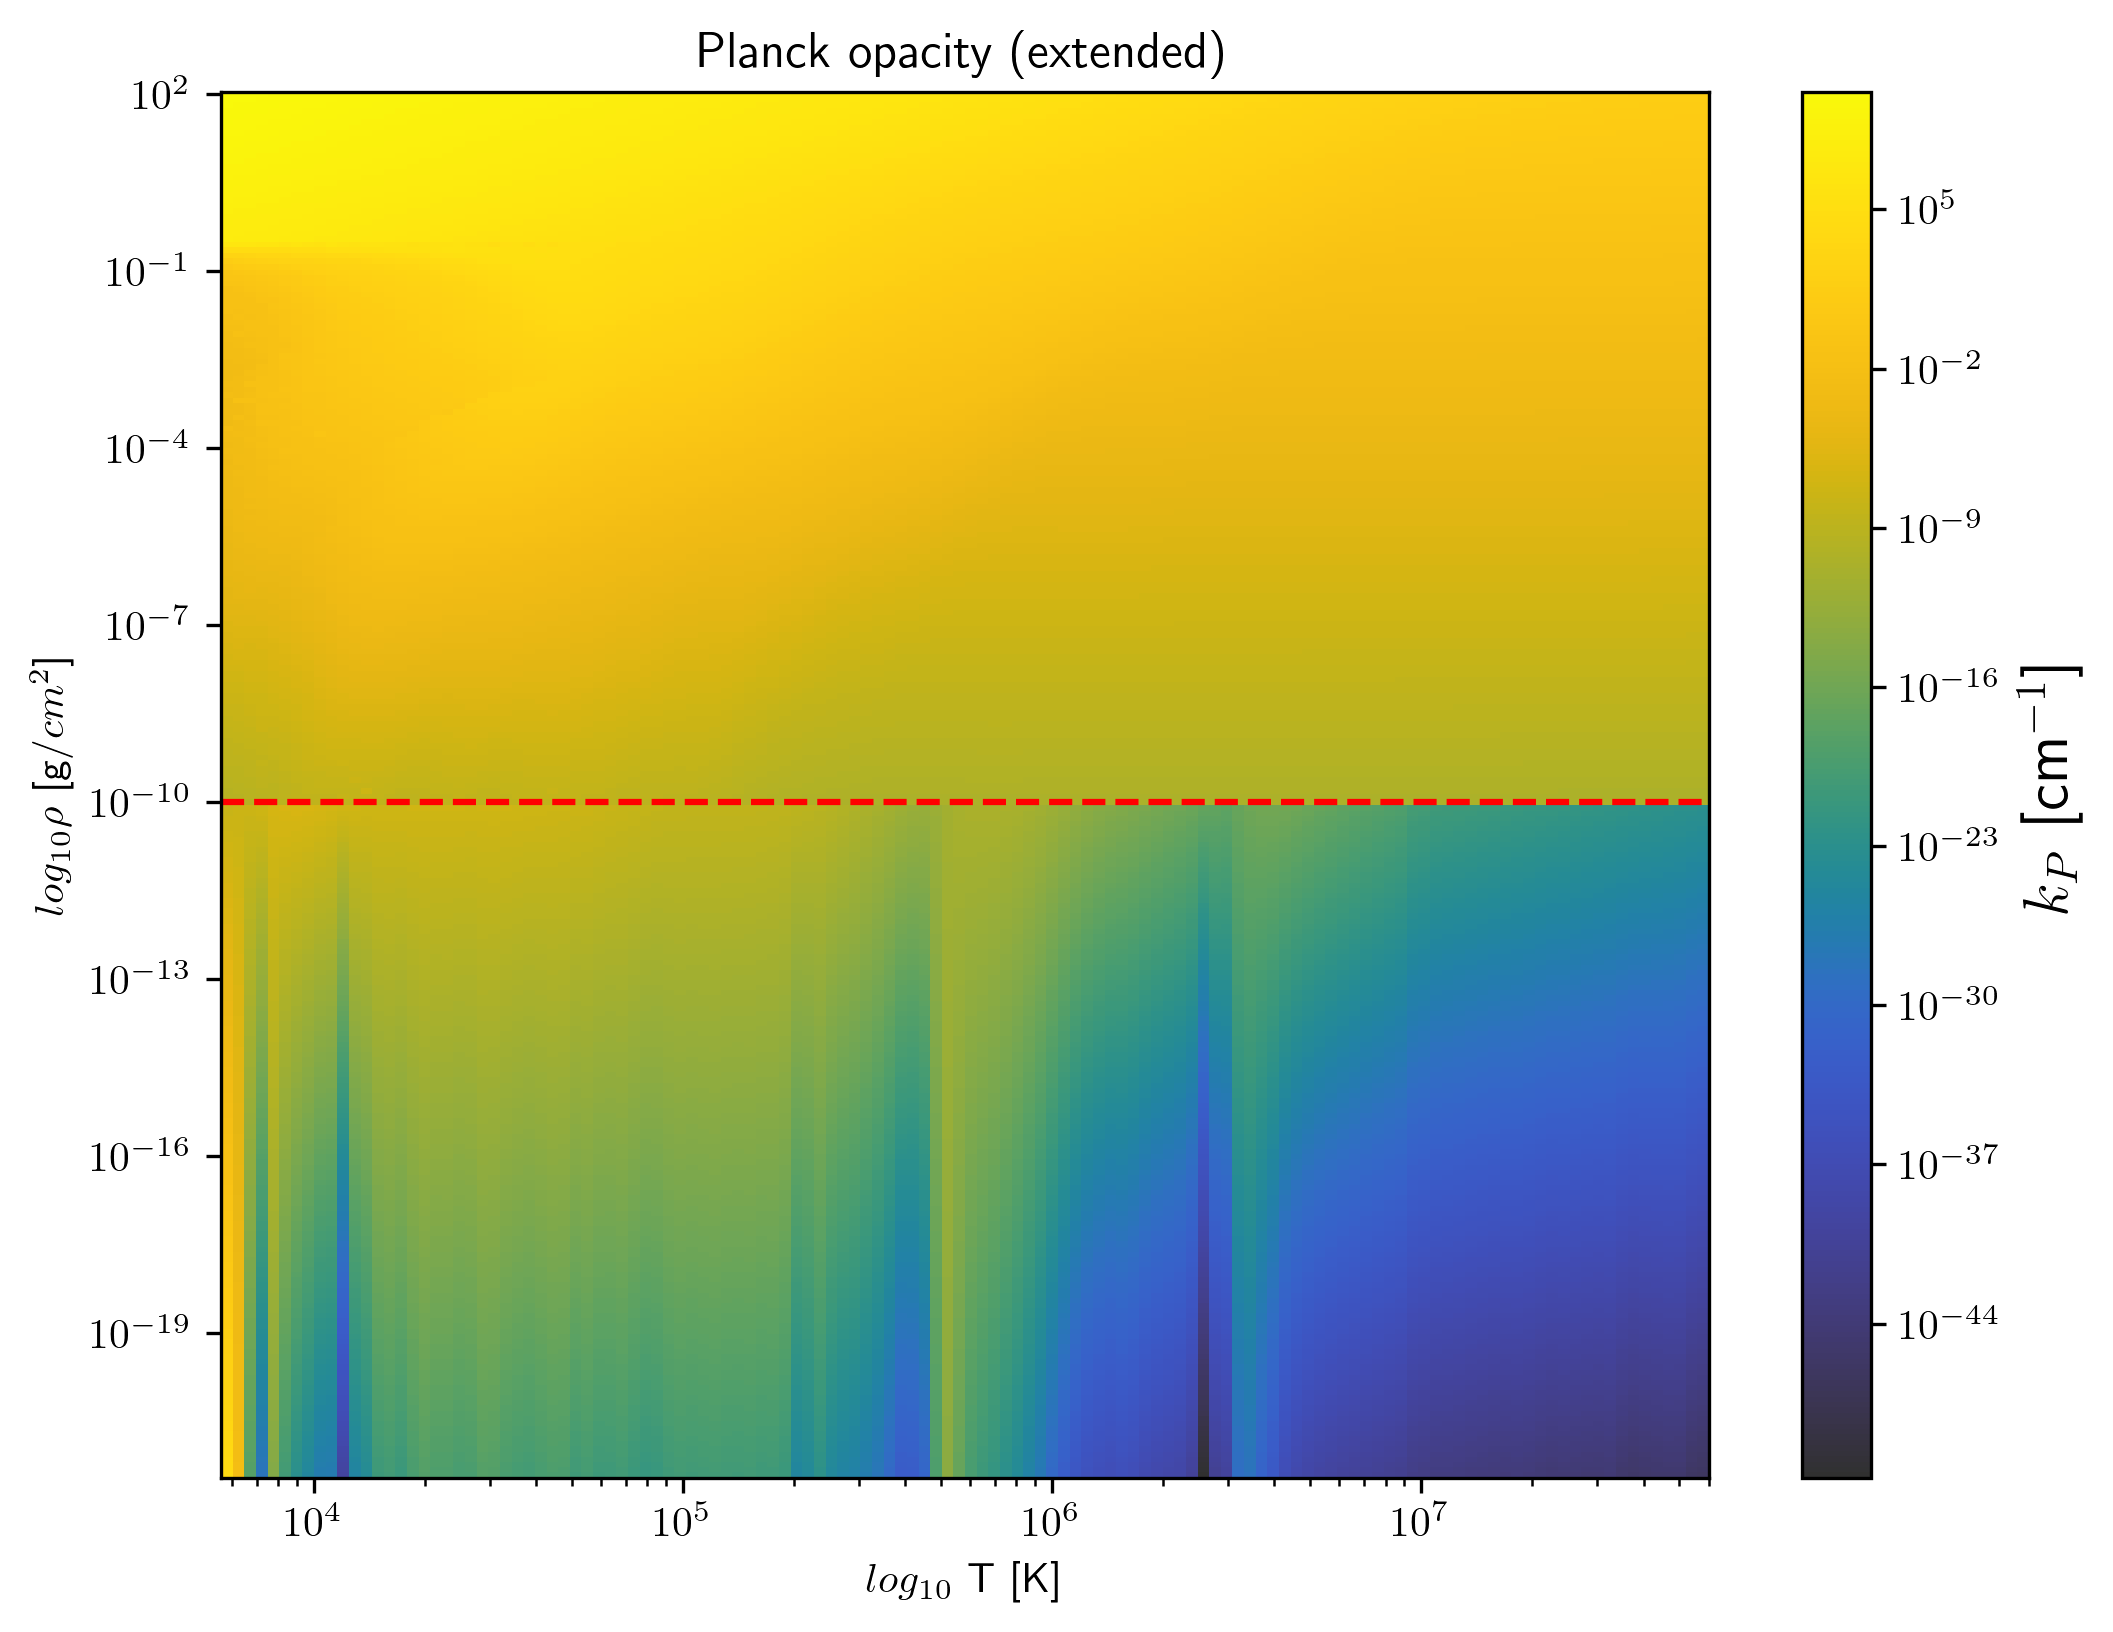

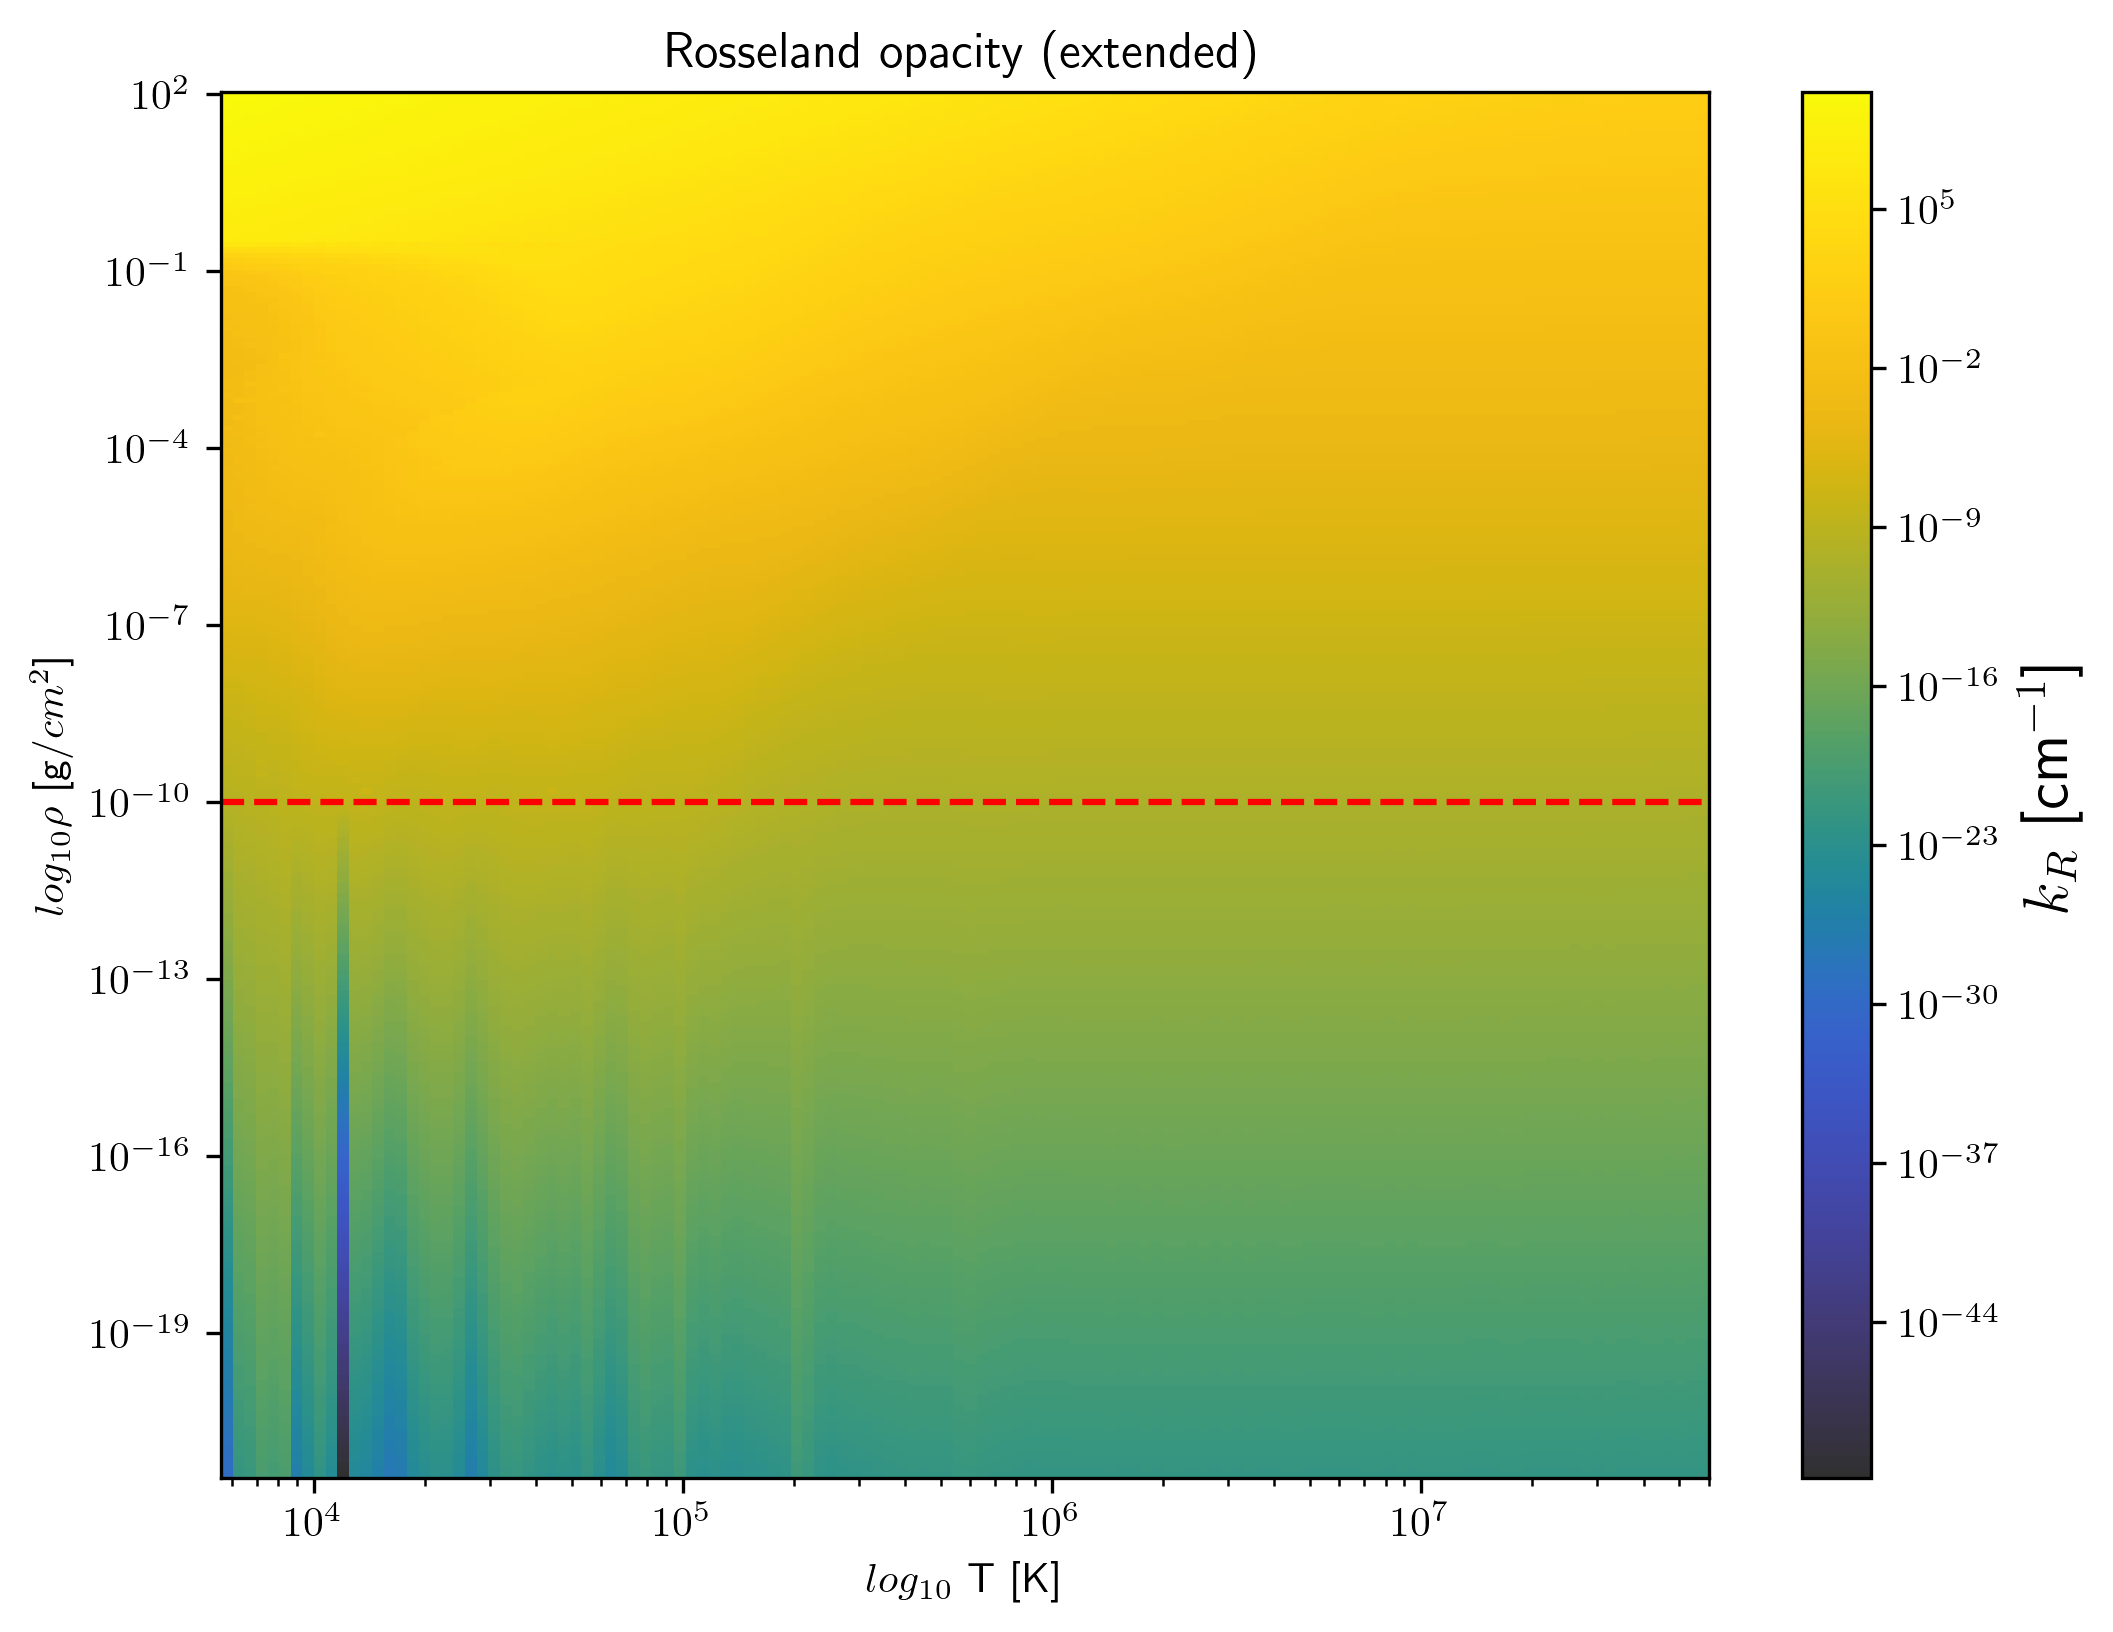

In [35]:
planck_extended = np.exp(lnk_planck_extended)
planck_extended = np.nan_to_num(planck_extended, nan = 0, posinf = 0, neginf= 0)
ross_extended = np.exp(lnk_ross_extended)
ross_extended = np.nan_to_num(ross_extended, nan = 0, posinf = 0, neginf= 0)
rho_extended = np.exp(lnrho_extended)
rho_extended = np.nan_to_num(rho_extended, nan = 0, posinf = 0, neginf= 0)

plt.figure(figsize = (8,6))
img = plt.pcolormesh(np.exp(lnT), rho_extended, planck_extended.T, cmap = 'cet_gouldian', norm = colors.LogNorm())
cbar = plt.colorbar(img)
cbar.set_label(r'$k_P$ [cm$^{-1}$]', fontsize = 15)
plt.xlabel('$log_{10}$ T [K]')
plt.ylabel(r'$log_{10}\rho$ [g/$cm^2$]')
img.axes.get_yaxis().set_ticks([])
plt.loglog()
plt.axhline(y=np.min(np.exp(lnrho)), color='r', linestyle='--')
plt.savefig('Paola/k_P_extended.png')
plt.title('Planck opacity (extended)')

plt.figure(figsize = (8,6))
img = plt.pcolormesh(np.exp(lnT), rho_extended, ross_extended.T, cmap = 'cet_gouldian', norm = colors.LogNorm())
cbar = plt.colorbar(img)
plt.title('Rosseland opacity')
cbar.set_label(r'$k_R$ [cm$^{-1}$]', fontsize = 15)
plt.xlabel('$log_{10}$ T [K]')
plt.ylabel(r'$log_{10}\rho$ [g/$cm^2$]')
img.axes.get_yaxis().set_ticks([])
plt.loglog()
plt.axhline(y=np.min(np.exp(lnrho)), color='r', linestyle='--')
plt.savefig('Paola/k_R_extended.png')
plt.title('Rosseland opacity (extended)')

In [31]:
# # TEST FOR EXTRAPOLATION
# from scipy.interpolate import CubicSpline

# def extrapolation_table(rho, kind):
#     extra = np.zeros(len(lnT))
#     for i in range(len(lnT)):
#         if kind == 'rosseland':
#             opacity_row = lnk_ross[i]
#         elif kind == 'planck':
#             opacity_row = lnk_planck[i]     
#         elif kind == 'effective':
#             opacity_row = np.add(lnk_planck[i], lnk_scatter[i])
#             opacity_row = np.multiply(3 * opacity_row, lnk_planck[i])
#             opacity_row = np.sqrt(opacity_row)   
#         elif kind == 'red':
#             opacity_row = np.add(lnk_planck[i], lnk_scatter[i])
#         cubicspl = CubicSpline(lnrho, opacity_row, bc_type='natural')
#         extra[i] = cubicspl(rho)
#     print(np.shape(extra))
#     return extra


# if __name__ == '__main__':
#     # Minimum we need is 3.99e-22, Elad's lnrho stops at 1e-10
#     rho_min = np.log(3.99e-22)
#     rho_max = np.log(8e-11)
#     expanding_rho = np.arange(rho_min,rho_max, 0.2)
#     expanding_rho = np.arange(1,5)
#     colum_expanded_rho = len(expanding_rho) + len(lnrho)
#     table_expansion = np.zeros( (len(lnT), colum_expanded_rho ))
#     for i, T in enumerate(lnT):
#         opacity_col = lnk_ross[i] # line to change
#         extra = CubicSpline(lnrho, opacity_col, bc_type='natural')
#         for j, rho in enumerate(expanding_rho):           
#             opi = extra(rho)
#             if opi > 0 :
#                 table_expansion[i,j] = opi
#         for j in range(len(expanding_rho),colum_expanded_rho):
#             table_expansion[i,j] = opacity_col[j-len(expanding_rho)]
    
#     all_rhos = np.concatenate((expanding_rho, lnrho))
#     np.savetxt('testR.txt', all_rhos)
#     np.savetxt('testross.txt', table_expansion)

     